<a href="https://colab.research.google.com/github/SSrishti-14/srishtisreyaADLab/blob/main/proj_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DIGIT** **RECOGNITION**


* TensorFlow operates on tensors, which are multi-dimensional arrays. These tensors flow through a series of mathematical operations, hence the name "TensorFlow."
* provides high-level APIs like Keras,supports CPU and GPU acceleration,create, train, and deploy machine learning models
* MNIST is a classification problem, where the goal is to identify the digit (0-9) in the image.
* used to experiment with a variety of algorithms,such as neural networks, support vector machines, k-nearest neighbors etc. used to experiment with feature extraction techniques, such as edge detection or dimensionality reduction




In [4]:
#importing the tensorflow library
import tensorflow as tf
print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.18.0


In [5]:
#importing the mnist dataset and do the tuple unpacking
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
#flatening to 1d array so that we can insert it into the fully connected neural network
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [9]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
# converting the datatype to float value and normalising it
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [11]:
print("Follwoing are the normalised values")
print(x_train[0])

Follwoing are the normalised values
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.      

In [12]:
print(y_train[0])

5


In [13]:
# now we will convert the labels into one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [14]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
# Now we will define the hyperparameters according to the architecture

n_input = 784
n_hidden_1 = 512
n_hidden_2 = 256
n_hidden_3 = 128
n_output = 10

# learning rate
learning_rate = 1e-4

In [16]:
# Now we will define the model for the fully connected neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(n_hidden_1, input_shape = (n_input,), activation= 'relu'),
    tf.keras.layers.Dense(n_hidden_2, activation= 'relu'),
    tf.keras.layers.Dense(n_hidden_3, activation= 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(n_output, activation= 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# compiling the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate),
    metrics = ['accuracy']
)

In [18]:
history = model.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 100,
    validation_data = (x_test, y_test)
)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1127 - loss: 2.3215 - val_accuracy: 0.1258 - val_loss: 2.2796
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1271 - loss: 2.2944 - val_accuracy: 0.1722 - val_loss: 2.2521
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1482 - loss: 2.2698 - val_accuracy: 0.2307 - val_loss: 2.2266
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1703 - loss: 2.2464 - val_accuracy: 0.2860 - val_loss: 2.2026
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.1941 - loss: 2.2212 - val_accuracy: 0.3389 - val_loss: 2.1796
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.2169 - loss: 2.1999 - val_accuracy: 0.3881 - val_loss: 2.1571
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2407 - loss: 2.1804 - val_accuracy: 0.4303 - val_loss: 2.1351
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2647 - loss: 2.1554 

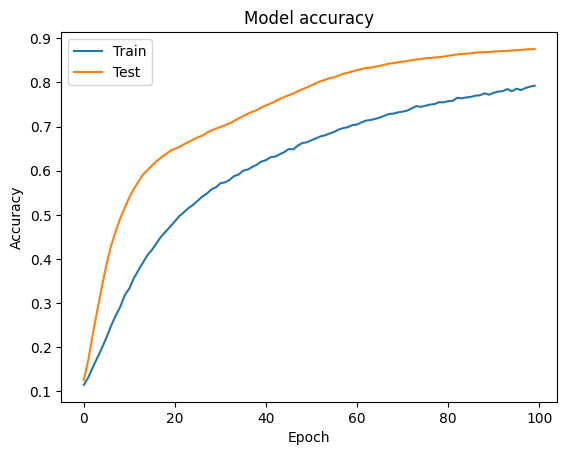

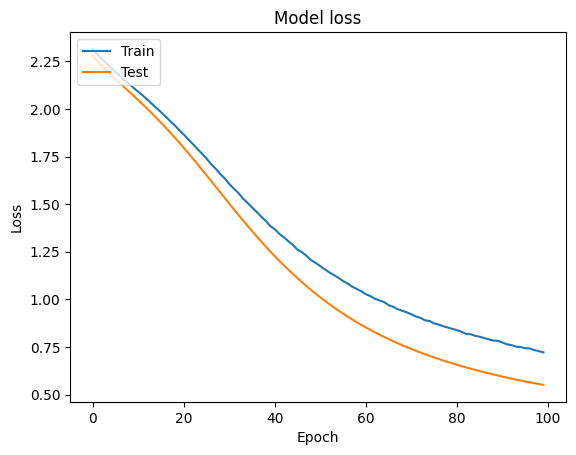

In [19]:
# prompt: plot the graph for loss and accuracy

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()